In [212]:
import pandas as pd, requests
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# import packages         
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 

# IPython command, puts plots in notebook 
%matplotlib inline

print('Today is', dt.date.today())
print('Python version:\n', sys.version, sep='') ## Question 0

Today is 2017-12-20
Python version:
3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [19]:
url = 'https://raw.githubusercontent.com/chrisc617/Data-Bootcamp-Final-Project/master/rollingsales_manhattan%20Clean.csv'
sales = pd.read_csv(url, sep=',')
print(sales.shape)
sales.head()
sales.columns=[i.strip().lower() for i in sales.columns]
sales = sales.drop(sales[['block','lot','ease-ment','building class at present','tax class at time of sale','building class at time of sale']],axis=1)

(18066, 21)


In [20]:
sales['sale price'].value_counts(dropna=False)
sales['sale price'] = sales['sale price'].replace(to_replace=[' -   '], value=[None])
sales['sale price'].value_counts(dropna=False)
sales=sales.dropna()
sales['sale price'].value_counts(dropna=False)
print(sales.shape)
sales['land square feet'].value_counts(dropna=False)
sales['land square feet'] = sales['land square feet'].replace(to_replace=[' -   '], value=[None])
sales['land square feet'] = sales['land square feet'].replace(to_replace=['           . '], value=[None])
sales['land square feet'].value_counts(dropna=False)
sales=sales.dropna()
sales['land square feet'].value_counts(dropna=False)
print(sales.shape)
sales.head()

(14401, 15)
(971, 15)


,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,"2,059","3,696",1900,"7,738,700",12/22/2016
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,"1,750","6,500",1900,"3,750,000",4/3/2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,"2,650","9,960",1910,"5,235,000",7/11/2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,"1,633","6,440",1900,"6,625,000",7/19/2017
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,301 EAST 10TH STREET,,10009,6,0,6,"2,369","4,615",1900,"8,000,000",11/17/2016


In [25]:
sales[['zip code','borough']] = sales[['zip code','borough']].astype(str)
sales['sale price'] = sales['sale price'].apply(lambda x: x.replace(',',''))
sales['land square feet'] = sales['land square feet'].apply(lambda x: x.replace(',',''))
sales.head()
sales[['sale price','land square feet']] = sales[['sale price','land square feet']].astype(float)
sales

,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,2059.0,"3,696",1900,7738700.0,12/22/2016
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,1750.0,"6,500",1900,3750000.0,4/3/2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,2650.0,"9,960",1910,5235000.0,7/11/2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,1633.0,"6,440",1900,6625000.0,7/19/2017
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,301 EAST 10TH STREET,,10009,6,0,6,2369.0,"4,615",1900,8000000.0,11/17/2016
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,629 EAST 5TH STREET,,10009,24,0,24,4489.0,"18,523",1920,16232000.0,11/7/2016
20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,244 EAST 7TH STREET,,10009,24,0,24,4131.0,"16,776",1928,11900000.0,6/21/2017
169,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,624 EAST 9TH STREET,,10009,3,1,4,1520.0,"3,360",1910,3300000.0,11/15/2016
170,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,165 AVENUE B,,10009,4,1,5,2201.0,"5,608",1900,7215000.0,1/30/2017
171,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,183 AVENUE B,,10009,5,1,6,1779.0,"3,713",1910,4750000.0,4/3/2017


In [28]:
sales['sale per sq feet']=sales['sale price']/sales['land square feet']
sales['sale per sq feet']=sales['sale per sq feet'].round(2)
sales

,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date,sale per sq feet
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,2059.0,"3,696",1900,7738700.0,12/22/2016,3758.47
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,1750.0,"6,500",1900,3750000.0,4/3/2017,2142.86
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,2650.0,"9,960",1910,5235000.0,7/11/2017,1975.47
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,1633.0,"6,440",1900,6625000.0,7/19/2017,4056.95
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,301 EAST 10TH STREET,,10009,6,0,6,2369.0,"4,615",1900,8000000.0,11/17/2016,3376.95
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,629 EAST 5TH STREET,,10009,24,0,24,4489.0,"18,523",1920,16232000.0,11/7/2016,3615.95
20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,244 EAST 7TH STREET,,10009,24,0,24,4131.0,"16,776",1928,11900000.0,6/21/2017,2880.66
169,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,624 EAST 9TH STREET,,10009,3,1,4,1520.0,"3,360",1910,3300000.0,11/15/2016,2171.05
170,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,165 AVENUE B,,10009,4,1,5,2201.0,"5,608",1900,7215000.0,1/30/2017,3278.06
171,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,183 AVENUE B,,10009,5,1,6,1779.0,"3,713",1910,4750000.0,4/3/2017,2670.04


In [2]:
url3 = 'https://raw.githubusercontent.com/chrisc617/Data-Bootcamp'
url4 = '-Final-Project/master/NYC_Transit_Subway_Entrance_And_Exit_Data.csv'
url5 = url3+url4
df=pd.read_csv(url5)
df['geocode_data'] = ''
df['city'] = ''
df['country'] = ''

from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [3]:
def reverse_geocode(latlng):
    result = {}
    url = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={}'
    request = url.format(latlng)
    data = requests.get(request).json()
    if len(data['results']) > 0:
        result = data['results'][0]
    return result

In [4]:
df

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location,geocode_data,city,country
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)",,,
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)",,,
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.654490, -74.004499)",,,


In [4]:
dfbmt=df[df['Division'] == 'BMT']
dfbmt.shape

(442, 35)

In [115]:
dfbmt['Corner'].value_counts()
dfbmtse=dfbmt[dfbmt['Corner'] == 'SE']
dfbmtse

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location,geocode_data,city,country
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)",,,
10,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,NaN,NaN,NaN,NaN,...,4th Ave,53rd St,SE,40.644493,-74.014419,"(40.645069, -74.014034)","(40.644493, -74.014419)",,,
12,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,NaN,NaN,NaN,NaN,...,4th Ave,53rd St,SE,40.644601,-74.014309,"(40.645069, -74.014034)","(40.644601, -74.014309)",,,
19,BMT,4 Avenue,59th St,40.641362,-74.017881,N,R,NaN,NaN,NaN,...,4th Ave,60th St,SE,40.640501,-74.018531,"(40.641362, -74.017881)","(40.640501, -74.018531)",,,
24,BMT,4 Avenue,86th St,40.622687,-74.028398,R,NaN,NaN,NaN,NaN,...,4th Ave,86th St,SE,40.622583,-74.028315,"(40.622687, -74.028398)","(40.622583, -74.028315)",,,
37,BMT,4 Avenue,DeKalb Av,40.690635,-73.981824,B,Q,R,NaN,NaN,...,Flatbush Ave,De Kalb Ave,SE,40.689804,-73.981164,"(40.690635, -73.981824)","(40.689804, -73.981164)",,,
39,BMT,4 Avenue,DeKalb Av,40.690635,-73.981824,B,Q,R,NaN,NaN,...,Flatbush Ave,De Kalb Ave,SE,40.689817,-73.981082,"(40.690635, -73.981824)","(40.689817, -73.981082)",,,
40,BMT,4 Avenue,DeKalb Av,40.690635,-73.981824,B,Q,R,NaN,NaN,...,Flatbush Ave,De Kalb Ave,SE,40.689740,-73.981156,"(40.690635, -73.981824)","(40.689740, -73.981156)",,,
47,BMT,4 Avenue,Prospect Av,40.665414,-73.992872,R,NaN,NaN,NaN,NaN,...,4th Ave,Prospect Ave,SE,40.665269,-73.993245,"(40.665414, -73.992872)","(40.665269, -73.993245)",,,
48,BMT,4 Avenue,Union St,40.677316,-73.983110,R,NaN,NaN,NaN,NaN,...,4th Ave,Union St,SE,40.677001,-73.983133,"(40.677316, -73.98311)","(40.677001, -73.983133)",,,


In [187]:
dfbmt['Route1'].value_counts()

N     92
J     77
L     68
R     57
D     48
B     48
A     20
M     11
F     10
Q      6
FS     3
G      2
Name: Route1, dtype: int64

In [34]:
dfbmt['latlng'] = dfbmt.apply(lambda row: '{},{}'.format(row['Entrance Latitude'], row['Entrance Longitude']), axis=1)
dfbmt['geocode_data'] = dfbmt['latlng'].map(reverse_geocode)
dfbmt['Zip'] =dfbmt['latlng'].apply(geolocator.reverse)
foo = lambda x: pd.Series([i for i in reversed(x.split(','))])
dfbmt['Zip']=dfbmt['Zip'].apply(lambda x: str(x))
dfbmt['Zip']=dfbmt['Zip'].apply(foo)[1]

dfbmt

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [36]:
dfbmt.columns

Index(['Division', 'Line', 'Station Name', 'Station Latitude',
       'Station Longitude', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Route6', 'Route7', 'Route8', 'Route9', 'Route10', 'Route11',
       'Entrance Type', 'Entry', 'Exit Only', 'Vending', 'Staffing',
       'Staff Hours', 'ADA', 'ADA Notes', 'Free Crossover',
       'North South Street', 'East West Street', 'Corner', 'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location',
       'geocode_data', 'city', 'country', 'latlng', 'Zip'],
      dtype='object')

In [189]:
trains=dfbmt[['Line','Station Name','Route1','Zip']]
trains

,Line,Station Name,Route1,Zip
0,4 Avenue,25th St,R,11232
1,4 Avenue,25th St,R,11232
2,4 Avenue,36th St,N,11232
3,4 Avenue,36th St,N,11232
4,4 Avenue,36th St,N,11232
5,4 Avenue,45th St,R,11220
6,4 Avenue,45th St,R,11220
7,4 Avenue,45th St,R,11220
8,4 Avenue,45th St,R,11220
9,4 Avenue,53rd St,R,11220


In [190]:
trains['Station Name'].value_counts(dropna=False)
trains=trains.dropna()
trainscount=trains['Zip'].value_counts()
trainscount

 11211    23
 11214    22
 11207    20
 11220    19
 11219    18
 11237    18
 11201    16
 11235    16
 10003    15
 10019    15
 11385    13
 11206    13
 10013    12
 10010    11
 11209    11
 10006    11
 11215     9
 11224     8
 11208     8
 10001     8
 10004     8
 11418     8
 11102     7
 11228     7
 10038     7
 11221     7
 11106     6
 11223     6
 11421     6
 11230     6
 11226     6
 11236     5
 11225     5
 11217     5
 11232     5
 10035     5
 11229     5
 11204     5
 10002     4
 10009     4
 10005     4
 11105     4
 10022     4
 10036     3
 10012     3
 10007     3
 11238     3
 10011     3
 11101     2
 10280     2
 10065     2
 10021     1
 11379     1
 10014     1
 11378     1
 10018     1
 11377     1
Name: Zip, dtype: int64

In [191]:
trains['Count']=trains['Zip'].value_counts()
trains

,Line,Station Name,Route1,Zip,Count
0,4 Avenue,25th St,R,11232,NaN
1,4 Avenue,25th St,R,11232,NaN
2,4 Avenue,36th St,N,11232,NaN
3,4 Avenue,36th St,N,11232,NaN
4,4 Avenue,36th St,N,11232,NaN
5,4 Avenue,45th St,R,11220,NaN
6,4 Avenue,45th St,R,11220,NaN
7,4 Avenue,45th St,R,11220,NaN
8,4 Avenue,45th St,R,11220,NaN
9,4 Avenue,53rd St,R,11220,NaN


In [192]:
trains['Counts'] = trains.groupby(['Zip'])['Route1'].transform(len)
trains

,Line,Station Name,Route1,Zip,Count,Counts
0,4 Avenue,25th St,R,11232,NaN,5
1,4 Avenue,25th St,R,11232,NaN,5
2,4 Avenue,36th St,N,11232,NaN,5
3,4 Avenue,36th St,N,11232,NaN,5
4,4 Avenue,36th St,N,11232,NaN,5
5,4 Avenue,45th St,R,11220,NaN,19
6,4 Avenue,45th St,R,11220,NaN,19
7,4 Avenue,45th St,R,11220,NaN,19
8,4 Avenue,45th St,R,11220,NaN,19
9,4 Avenue,53rd St,R,11220,NaN,19


In [193]:
trains=trains[['Zip','Counts']]
trains =trains.drop_duplicates('Zip')
trains

,Zip,Counts
0,11232,5
5,11220,19
20,11209,11
31,11215,9
33,11217,5
37,11201,16
392,11102,7
395,11377,1
396,11106,6
399,11101,2


In [198]:
trains = trains.rename(columns={'Zip': 'zip code', 'Counts': '# of train stations'})
trains

,zip code,# of train stations
0,11232,5
5,11220,19
20,11209,11
31,11215,9
33,11217,5
37,11201,16
392,11102,7
395,11377,1
396,11106,6
399,11101,2


In [208]:
sales['zip code'] = sales['zip code'].apply(lambda x: str(x))
sales['zip code'] = sales['zip code'].apply(lambda x: x.strip())
trains['zip code'] = trains['zip code'].apply(lambda x: str(x))
trains['zip code'] = trains['zip code'].apply(lambda x: x.strip())



In [211]:
sales2= pd.merge(sales, trains, on='zip code')
sales2 = sales2.drop('# of train stations_x', axis=1)
sales2

,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date,sale per sq feet,# of train stations_y
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,264 EAST 7TH STREET,,10009,3,0,3,2059.0,"3,696",1900,7738700.0,12/22/2016,3758.47,4
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,738 EAST 6TH STREET,,10009,11,0,11,1750.0,"6,500",1900,3750000.0,4/3/2017,2142.86,4
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,27 AVENUE C,,10009,24,1,25,2650.0,"9,960",1910,5235000.0,7/11/2017,1975.47,4
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,153 AVENUE B,,10009,5,0,5,1633.0,"6,440",1900,6625000.0,7/19/2017,4056.95,4
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,301 EAST 10TH STREET,,10009,6,0,6,2369.0,"4,615",1900,8000000.0,11/17/2016,3376.95,4
5,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,629 EAST 5TH STREET,,10009,24,0,24,4489.0,"18,523",1920,16232000.0,11/7/2016,3615.95,4
6,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,244 EAST 7TH STREET,,10009,24,0,24,4131.0,"16,776",1928,11900000.0,6/21/2017,2880.66,4
7,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,624 EAST 9TH STREET,,10009,3,1,4,1520.0,"3,360",1910,3300000.0,11/15/2016,2171.05,4
8,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,165 AVENUE B,,10009,4,1,5,2201.0,"5,608",1900,7215000.0,1/30/2017,3278.06,4
9,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,183 AVENUE B,,10009,5,1,6,1779.0,"3,713",1910,4750000.0,4/3/2017,2670.04,4


In [222]:
sales2.describe

<bound method NDFrame.describe of     borough               neighborhood  \
0         1  ALPHABET CITY               
1         1  ALPHABET CITY               
2         1  ALPHABET CITY               
3         1  ALPHABET CITY               
4         1  ALPHABET CITY               
5         1  ALPHABET CITY               
6         1  ALPHABET CITY               
7         1  ALPHABET CITY               
8         1  ALPHABET CITY               
9         1  ALPHABET CITY               
10        1  EAST VILLAGE                
11        1  EAST VILLAGE                
12        1  EAST VILLAGE                
13        1  EAST VILLAGE                
14        1  EAST VILLAGE                
15        1  EAST VILLAGE                
16        1  CHELSEA                     
17        1  CHELSEA                     
18        1  CHELSEA                     
19        1  CHELSEA                     
20        1  CHELSEA                     
21        1  CHELSEA                     


In [223]:
sales2['zip code'].value_counts()

10011    54
10035    49
10014    41
10003    31
10013    28
10002    26
10001    25
10019    23
10022    22
10021    21
10065    21
10012    16
10009    16
10036    15
10010    10
10018    10
10007     5
10038     3
10005     3
10006     1
10004     1
Name: zip code, dtype: int64

In [216]:
import seaborn as sns


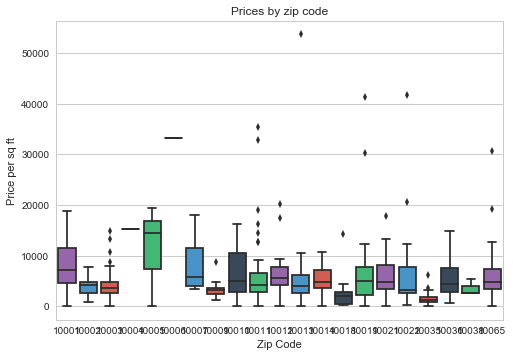

In [228]:
sns.set(style="whitegrid", 
        color_codes=True)

# Manually set color palette
col = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]

# Plot graph
sns.boxplot(x="zip code", 
            y="sale per sq feet", 
            data=sales2,
            palette=col)



# Add title and labels
plt.title('Prices by zip code')
plt.xlabel('Zip Code')
plt.ylabel('Price per sq ft')

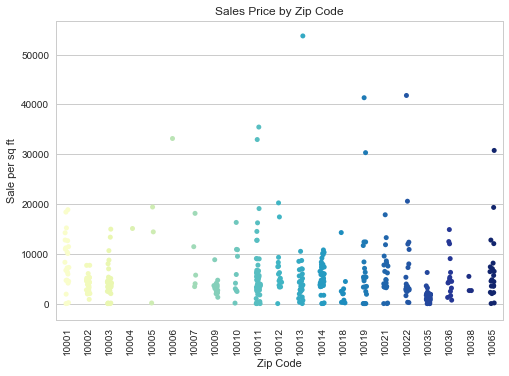

In [227]:
# Plot graph
g = sns.stripplot(x="zip code", 
              y="sale per sq feet", 
              data=sales2,
              palette='YlGnBu',
              jitter=True);

# rotate labels 90 degrees
for item in g.get_xticklabels():
    item.set_rotation(90)

# Add title and labels
plt.title('Sales Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Sale per sq ft')


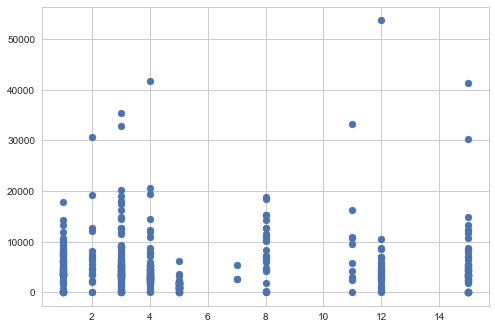

In [226]:
plt.scatter(sales2['# of train stations_y'], sales2['sale per sq feet'])
plt.show()